In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns;

# Z-Normalisation of the solutions

In [2]:
genes = ["Sr.No","States","HNF1","HNF4","PPAR","SREBP"]
sol = []

sol.append(pd.read_table("TS_solution_1.dat", names = genes))
z_norm_sol1 = pd.DataFrame(columns = genes)

for i in range(2,6):
    data = sol[0][sol[0].columns[i]]
    mean = data.mean()
    std = data.std()
    sol[0][sol[0].columns[i]] = (data - mean)/std

genes = ["Sr.No","States","HNF1","HNF4","PPAR","SREBP","HNF12","HNF42","PPAR2","SREBP2"]

sol.append(pd.read_table("TS_solution_2.dat", names = genes))

for i in range(2,10):
    data = sol[1][sol[1].columns[i]]
    mean = data.mean()
    std = data.std()
    sol[1][sol[1].columns[i]] = (data - mean)/std

genes = ["Sr.No","States","HNF1","HNF4","PPAR","SREBP","HNF12","HNF42","PPAR2","SREBP2","HNF13","HNF43","PPAR3","SREBP3"]

sol.append(pd.read_table("TS_solution_3.dat", names = genes))

for i in range(2,14):
    data = sol[2][sol[2].columns[i]]
    mean = data.mean()
    std = data.std()
    sol[2][sol[2].columns[i]] = (data - mean)/std

genes = ["Sr.No","States","HNF1","HNF4","PPAR","SREBP","HNF12","HNF42","PPAR2","SREBP2","HNF13","HNF43","PPAR3","SREBP3","HNF14","HNF44","PPAR4","SREBP4"]

sol.append(pd.read_table("TS_solution_4.dat", names = genes))

for i in range(2,18):
    data = sol[3][sol[3].columns[i]]
    mean = data.mean()
    std = data.std()
    sol[3][sol[3].columns[i]] = (data - mean)/std

sol[1]

,Sr.No,States,HNF1,HNF4,PPAR,SREBP,HNF12,HNF42,PPAR2,SREBP2
0,4,2,1.175995,1.426151,-0.893325,-0.750249,-0.560985,-0.408886,1.410870,1.041841
1,7,2,1.275972,1.001152,-0.841798,-0.658169,-0.802177,-1.297865,1.116741,1.019798
2,9,2,-1.179473,0.068960,-0.205655,-0.505897,-1.418059,-1.025505,1.212993,1.038536
3,17,2,1.155320,1.453406,-0.998100,-1.233679,-0.821521,-0.372064,1.121698,0.739612
4,18,2,0.236965,0.658529,-0.708739,-1.018600,1.259052,1.342469,-1.446119,-1.271139
...,...,...,...,...,...,...,...,...,...,...
244,983,2,-0.806528,-0.389952,-0.476771,-1.203353,-1.068222,-1.495520,1.022018,0.692656
245,984,2,1.240974,1.059216,-1.284870,-0.863730,0.596194,-0.575092,0.669296,1.087411
246,986,2,1.287054,0.959360,-1.405707,-1.255840,-0.350653,-0.704756,-0.782167,-1.519930
247,997,2,-0.559508,-1.017661,-0.507831,-0.802599,-0.755043,-1.969736,0.731771,0.981645


# Collecting stable values of every node 

In [3]:
HNF1 = []
HNF4 = []
PPAR = []
SREBP = []

genes = [HNF1,HNF4,PPAR,SREBP]
for i in range(1,5):
    for j in range(0,4):
        for y in range(0,j+1):
            for x in range(1,len(sol[j][sol[j].columns[0]])):
                genes[i-1].append(sol[j].iloc[x,y*4 + 1 + i])
len(genes[1])      

2781

In [4]:
X = np.vstack((genes[1], genes[2])).T

# Plotting Kernel Density Estimates

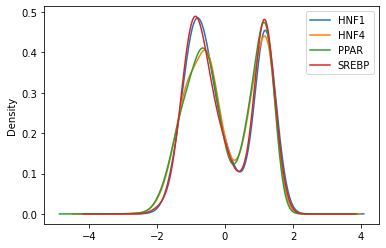

In [5]:
for i in range(0,4):
    genes[i] = pd.Series(genes[i])
    genes[i].plot.kde()
plt.legend(labels = ["HNF1","HNF4","PPAR","SREBP"])

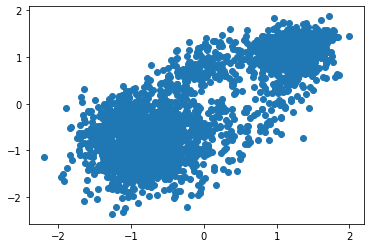

In [6]:
plt.scatter(HNF1,HNF4)

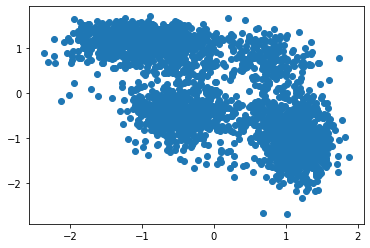

In [7]:
plt.scatter(HNF4,PPAR)

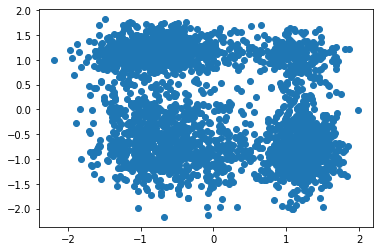

In [8]:
plt.scatter(HNF1,SREBP)

# Clustering HNF4 v PPAR

Text(0, 0.5, 'PPARG')

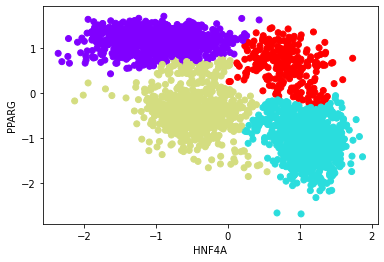

In [14]:
cluster = AgglomerativeClustering(n_clusters=4)
cluster.fit(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')

plt.xlabel("HNF4A")
plt.ylabel("PPARG")

# Heatmaps of Resulting Clusters

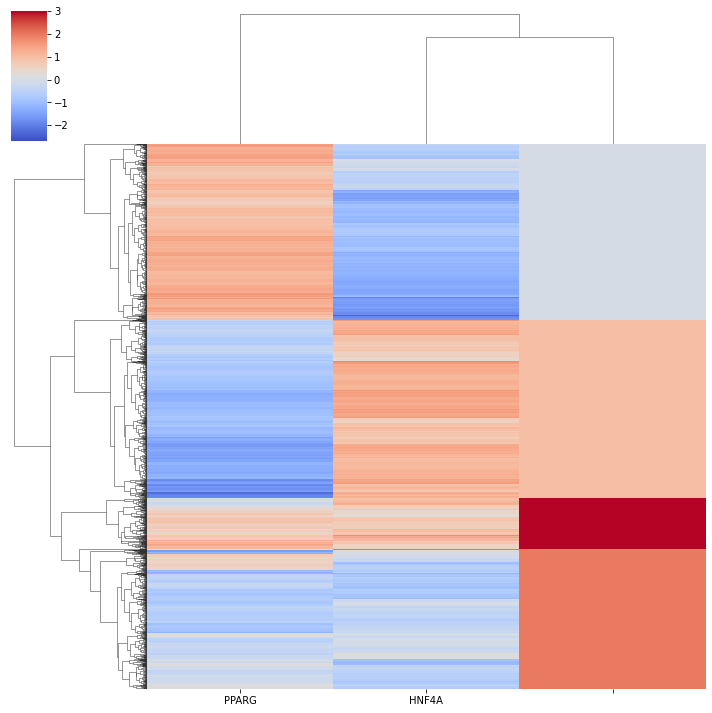

In [34]:
# Heatmap of HNF4 and PPARG with clustering
Y = np.vstack([X.T,cluster.labels_]).T
x_axis_labels = ["HNF4A","PPARG",""]
y_axis_labels = []

sns.clustermap(Y, cmap='coolwarm',xticklabels=x_axis_labels, yticklabels=y_axis_labels)